In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load CSV
data = pd.read_csv("/content/Telco Customer Churn.csv")

# Drop customerID as it is not useful
data = data.drop('customerID', axis=1)

# Convert TotalCharges to numeric and fill missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Encode categorical columns
for col in data.select_dtypes(include=['object']).columns:
    if col != 'Churn':  # Target column
        data[col] = LabelEncoder().fit_transform(data[col])

# Encode target
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

# Split features and target
X = data.drop('Churn', axis=1).values
y = data['Churn'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Number of input features
input_dim = X_train.shape[1]

# Define the model
model = Sequential([
    Input(shape=(input_dim,)),    # Correct way to specify input shape
    Dense(32, activation='relu'), # Hidden layer 1
    Dense(16, activation='relu'), # Hidden layer 2 (optional)
    Dense(1, activation='sigmoid') # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Optional: Check model summary
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # optional, monitor validation
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6453 - loss: 0.6156 - val_accuracy: 0.7959 - val_loss: 0.4364
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7817 - loss: 0.4557 - val_accuracy: 0.8030 - val_loss: 0.4194
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7746 - loss: 0.4503 - val_accuracy: 0.7995 - val_loss: 0.4142
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8004 - loss: 0.4246 - val_accuracy: 0.8021 - val_loss: 0.4120
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.4087 - val_accuracy: 0.7968 - val_loss: 0.4121
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8030 - loss: 0.4177 - val_accuracy: 0.8012 - val_loss: 0.4123
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8112 - loss: 0.4054 - val_accuracy: 0.8012 - val_loss: 0.4113
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8044 - loss: 0.4173 - val_accu

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


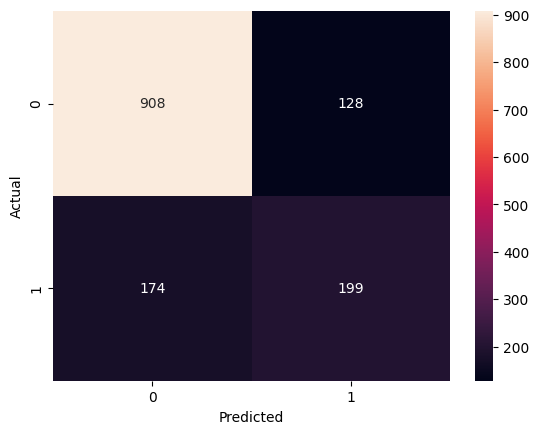

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [11]:
# Predict probabilities
y_pred_prob = model.predict(X_test)
# Convert probabilities to 0/1
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred))
